# Manipulando Datos - Titanic

# Importando Librerias

In [1]:
import os
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

client_a134f8ac93734b37bd6ff1a1030d8baa = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OUuSpg0VgA-o5WA6JBEGNwDtA2eJo3zDHBcwVdOjwFM_',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')


### Ruta en donde se encuentran los archivos

# Importar / exportar Archivos .CSV Titanic ( entreanimiento y test )

**IMPORTAR DATOS**

df.read_csv(filename) - De un archivo CSV

df.read_table(filename) - Desde un archivo de texto delimitado (como TSV)

df.read_excel(filename) - De un archivo Excel

df.read_sql(query, connection_object) - Lee desde una BaseDeDatos/Tabla SQL

df.read_json(json_string) - Lee desde una cadena, URL o archivo con formato JSON

df.read_html(url) - Analiza una URL html, una cadena o un archivo y extrae tablas a una lista

df.read_clipboard() - Toma el contenido del porta papeles

df.DataFrame(dict) - Desde un diccionario

**EXPORTAR DATOS** 

df.to_csv(filename) - Escribir en un archivo CSV

df.to_excel(filename) - Escribir en un archivo Excel

df.to_sql(table_name, connection_object) - Escribir en una tabla SQL

df.to_json(filename) - Escribir en un archivo con formato JSON


### df.read_csv(filename) - De un archivo CSV

In [2]:
def load_train_dataset():
    csv_path = client_a134f8ac93734b37bd6ff1a1030d8baa.get_object(Bucket='covid-donotdelete-pr-tv17s71l1pduzg',Key='train.csv')['Body']
    # add missing __iter__ method, so pandas accepts body as file-like object
    if not hasattr(csv_path, "__iter__"): csv_path.__iter__ = types.MethodType( __iter__, csv_path )
    
    return pd.read_csv(csv_path)

In [3]:
def load_test_dataset():
    
    csv_path = client_a134f8ac93734b37bd6ff1a1030d8baa.get_object(Bucket='covid-donotdelete-pr-tv17s71l1pduzg',Key='test.csv')['Body']
    # add missing __iter__ method, so pandas accepts body as file-like object
    if not hasattr(csv_path, "__iter__"): csv_path.__iter__ = types.MethodType( __iter__, csv_path )

    return pd.read_csv(csv_path)

In [5]:
titanic_train = load_train_dataset()

In [6]:
titanic_test = load_test_dataset()

# Visualizar los datos

### df.head(n) - Primeras n filas del DataFrame



In [7]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### df.tail(n) - Las últimas n filas del DataFrame

In [8]:
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### df.shape() - Número de filas y columnas


In [9]:
titanic_train.shape

(891, 12)

### df.dtypes - Tipo de dato de cada columnas



In [10]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### df.info() - Índice, tipo de datos y memoria

In [11]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### df.describe() - Estadísticas resumidas de columnas numéricas

In [12]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Estadisticas

df.corr() - Devuelve la correlación entre columnas en un DataFrame

df.min() - Devuelve el valor más bajo en cada columna

df.median() - Devuelve la media de cada columna

### df.count() - Devuelve el número de valores no nulos en cada columna DataFrame

In [13]:
titanic_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### df.max() - Devuelve el valor más alto en cada columna

In [14]:
titanic_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

### df.mean() - Devuelve la media de todas las columnas


In [15]:
titanic_train.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

### df.std() - Devuelve la desviación estándar de cada columna

In [16]:
titanic_train.std()

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

# Limpieza de Datos

df.columns = ['a', 'b', 'c'] - Renombrar columnas

df.isnull() - Comprueba valores nulos, devuelve Boolean Arrays

df.notnull() - El opuesto a pd.isnull()

df.dropna() - Elimina todas las filas que contienen valores nulos

df.dropna(axis=1) - Elimina todas las columnas que contienen valores nulos

df.dropna(axis=1, thresh=n) - Elimina todas las filas que tienen menos de n valores no nulos

df.fillna(x) - Remplaza todos los valores nulos por x

s.fillna(s.mean()) - Remplaza todos los valores nulos por la media

s.astype(float) - Convierte el tipo de datos a float

sreplace(1, 'one') - Remplaza todos los valores iguales a 1 con 'one'

s.repalce([1, 3], ['one', 'three']) - Remplaza todos los 1 por 'one' y 3 por 'three'

df.rename(columns=lambda x: x + 1) - Cambio de nombre de columnas en masa

df.rename(columns={'old_name':'new_name'}) - Renombrar seleccionando columna

df.set_index('column_one') - Cambiar el índice

df.rename(index=lambda x: x + 1) - Cambio el índice en masa


### df.columns = ['a', 'b', 'c'] - Renombrar columnas

In [17]:
cabecera = ['Pasajero', 'Sobreviviente','Clase', 'Nombre', 'Sexo', 
            'Edad', 'Hermanos', 'Hijos', 'Boleto', 'Tarifa', 'Cabina', 'Embarque'] 
titanic_train.columns = cabecera
titanic_train.head()

,Pasajero,Sobreviviente,Clase,Nombre,Sexo,Edad,Hermanos,Hijos,Boleto,Tarifa,Cabina,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### df.isnull() - Comprueba valores nulos, devuelve Boolean Arrays

In [18]:
titanic_train.isnull()

,Pasajero,Sobreviviente,Clase,Nombre,Sexo,Edad,Hermanos,Hijos,Boleto,Tarifa,Cabina,Embarque
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


### df.isnull().sum() - Cantidad de nulos por columnas

In [19]:
titanic_train.isnull().sum()

Pasajero           0
Sobreviviente      0
Clase              0
Nombre             0
Sexo               0
Edad             177
Hermanos           0
Hijos              0
Boleto             0
Tarifa             0
Cabina           687
Embarque           2
dtype: int64

### Eliminando datos nulos ( filas )

In [20]:
titanic_train.dropna(axis = 0)

,Pasajero,Sobreviviente,Clase,Nombre,Sexo,Edad,Hermanos,Hijos,Boleto,Tarifa,Cabina,Embarque
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


### Eliminando datos nulos (columnas )

In [21]:
titanic_train.dropna(axis = 1)

,Pasajero,Sobreviviente,Clase,Nombre,Sexo,Hermanos,Hijos,Boleto,Tarifa
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708


## Eliminando datos faltantes ( cabina, edad, embarque )

In [22]:
titanic_train[titanic_train['Edad'].isnull()][['Sexo', 'Clase', 'Edad']].head()

,Sexo,Clase,Edad
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [23]:
titanic_train.dropna(subset= ['Cabina'], axis = 0, inplace = True)
titanic_train.head()
titanic_train.isnull().sum()

Pasajero          0
Sobreviviente     0
Clase             0
Nombre            0
Sexo              0
Edad             19
Hermanos          0
Hijos             0
Boleto            0
Tarifa            0
Cabina            0
Embarque          2
dtype: int64

In [24]:
titanic_train.dropna(subset= ['Edad'], axis = 0, inplace = True)
titanic_train.head()
titanic_train.isnull().sum()

Pasajero         0
Sobreviviente    0
Clase            0
Nombre           0
Sexo             0
Edad             0
Hermanos         0
Hijos            0
Boleto           0
Tarifa           0
Cabina           0
Embarque         2
dtype: int64

In [25]:
titanic_train.dropna(subset= ['Embarque'], axis = 0, inplace = True)
titanic_train.head()
titanic_train.isnull().sum()

Pasajero         0
Sobreviviente    0
Clase            0
Nombre           0
Sexo             0
Edad             0
Hermanos         0
Hijos            0
Boleto           0
Tarifa           0
Cabina           0
Embarque         0
dtype: int64

## Reemplazar Datos Faltantes ( edad )

Calculamos el promedio de Edad

In [26]:
titanic_train['Edad'].mean()

35.6744262295082

In [28]:
promedio = titanic_train['Edad'].mean()

Reemplazamos datos faltantes por promedio

In [29]:
titanic_train['Edad'].replace(np.nan, promedio)

1      38.0
3      35.0
6      54.0
10      4.0
11     58.0
21     34.0
23     28.0
27     19.0
52     49.0
54     65.0
62     45.0
66     29.0
75     25.0
88     23.0
92     46.0
96     71.0
97     23.0
102    21.0
110    47.0
118    24.0
123    32.5
124    54.0
136    19.0
137    37.0
139    24.0
148    36.5
151    22.0
170    61.0
174    56.0
177    50.0
       ... 
737    35.0
741    36.0
742    21.0
745    70.0
748    19.0
751     6.0
759    33.0
763    36.0
765    51.0
772    57.0
779    43.0
781    17.0
782    29.0
789    46.0
796    49.0
802    11.0
806    39.0
809    33.0
820    52.0
823    27.0
835    39.0
853    16.0
857    51.0
862    48.0
867    31.0
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Edad, Length: 183, dtype: float64

### Cambiando columnas categoricas a numericas

Valores unicos de columna Sexo

In [30]:
titanic_train['Sexo'].replace(['female','male'],[0,1],inplace= True)
titanic_train.head()

,Pasajero,Sobreviviente,Clase,Nombre,Sexo,Edad,Hermanos,Hijos,Boleto,Tarifa,Cabina,Embarque
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


In [31]:
sexes = sorted(titanic_train['Sexo'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping


{0: 0, 1: 1}

In [32]:
titanic_train['Sex_Val'] = titanic_train['Sexo'].map(genders_mapping).astype(int)
titanic_train.head()

,Pasajero,Sobreviviente,Clase,Nombre,Sexo,Edad,Hermanos,Hijos,Boleto,Tarifa,Cabina,Embarque,Sex_Val
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S,0


In [33]:
titanic_train.isnull().sum()

Pasajero         0
Sobreviviente    0
Clase            0
Nombre           0
Sexo             0
Edad             0
Hermanos         0
Hijos            0
Boleto           0
Tarifa           0
Cabina           0
Embarque         0
Sex_Val          0
dtype: int64

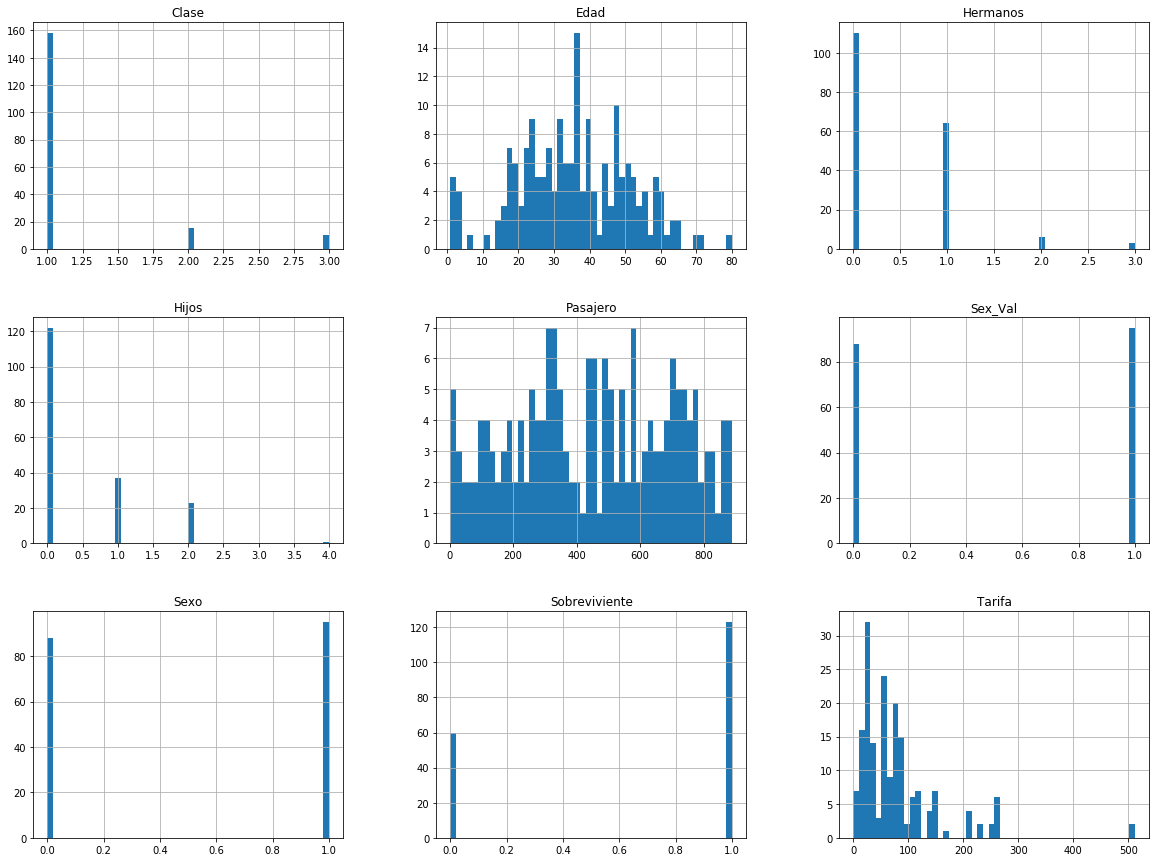

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic_train.hist(bins=50, figsize=(20, 15))
plt.show()